In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import torch
import torchvision
from torchvision.datasets import MNIST
from torch import optim
import torchvision.transforms as transforms

In [8]:
dataset=MNIST(root="data/",download=True)
len(dataset)

60000

In [9]:
print(dataset[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x7F11C627AB10>, 5)


In [10]:
test_dataset=MNIST(root="data/",train=False,transform=transforms.ToTensor())
len(test_dataset)

10000

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


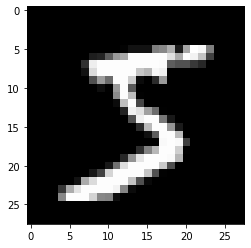

In [12]:
image,label=dataset[0]
plt.imshow(image,cmap="gray")
print("Label:",label)

In [13]:
import torchvision.transforms as transforms
dataset=MNIST(root="data/",train=True,transform=transforms.ToTensor())
img_tensor,label=dataset[0]
print(img_tensor.shape)

torch.Size([1, 28, 28])


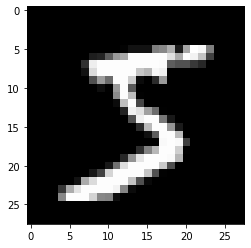

In [14]:
plt.imshow(img_tensor[0],cmap="gray")

In [15]:
def split_indices(n,val_pct):
    n_val=int(val_pct*n)
    idx=np.random.permutation(n)
    return idx[n_val:],idx[:n_val]

In [16]:
train_indices,val_indices=split_indices(len(dataset),val_pct=0.2)

In [17]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [18]:
batch_size=100
train_sampler=SubsetRandomSampler(train_indices)
train_loader=DataLoader(dataset,batch_size,sampler=train_sampler)

In [19]:

val_sampler=SubsetRandomSampler(val_indices)
val_loader=DataLoader(dataset,batch_size,sampler=val_sampler)

In [20]:
import torch.nn as nn
input_size=28*28
num_classes=10

In [21]:
import torch.nn.functional as F
class DigitFind(nn.Module):
    def __init__(self):
        super().__init__()
        self.fx1=nn.Linear(input_size,128)
        self.fx2=nn.Linear(128,10)
        self.dropout=nn.Dropout(0.2)
        
    def forward(self,xb):
        xb=xb.reshape(-1,784)
        out1=self.dropout(F.relu(self.fx1(xb)))
        out2=self.fx2(out1)
        return out2
        

In [22]:
model=DigitFind()
for images,labels in train_loader:
    output=model(images)
    break
output    

tensor([[-1.3414e-01, -2.1997e-01,  2.9357e-02,  1.0724e-02, -2.7200e-01,
          2.7806e-01, -3.0114e-02, -1.0757e-01,  1.3396e-02, -7.7344e-02],
        [-1.0958e-01, -1.1058e-01,  3.6574e-02,  6.7913e-02, -2.0261e-01,
          9.5455e-02, -4.2270e-02,  3.9811e-02,  4.3535e-02,  4.1323e-02],
        [-1.3251e-01, -1.6156e-01, -2.4188e-02,  1.1718e-01, -1.3941e-01,
          1.1358e-01, -3.7702e-02,  6.8387e-02,  1.7134e-02,  1.1305e-01],
        [-4.1264e-02, -1.7110e-01,  8.1403e-02,  1.3824e-01, -1.3418e-01,
          7.7052e-02,  5.9374e-02, -1.9145e-02, -1.4025e-02, -4.0134e-02],
        [-2.2306e-02, -8.6319e-02, -1.0843e-01,  1.4755e-01, -3.0482e-01,
         -5.6766e-02, -9.0669e-03,  4.2179e-02,  1.4880e-01,  1.4489e-01],
        [-1.3617e-01, -8.4159e-02, -3.7287e-02,  6.5980e-02, -9.5385e-02,
          9.4523e-02,  1.0468e-01,  1.0073e-01, -2.8565e-02,  6.9055e-02],
        [-4.1530e-02, -5.0708e-02, -1.6976e-01,  1.0794e-01, -2.3669e-01,
          3.8421e-02, -8.8537e-0

In [23]:
probs=F.softmax(output,dim=1)
probs,labels

(tensor([[0.0910, 0.0835, 0.1072, 0.1052, 0.0793, 0.1375, 0.1010, 0.0935, 0.1055,
          0.0963],
         [0.0905, 0.0904, 0.1048, 0.1081, 0.0825, 0.1111, 0.0968, 0.1051, 0.1055,
          0.1053],
         [0.0877, 0.0852, 0.0977, 0.1126, 0.0871, 0.1122, 0.0964, 0.1072, 0.1019,
          0.1121],
         [0.0962, 0.0845, 0.1087, 0.1151, 0.0876, 0.1082, 0.1063, 0.0983, 0.0988,
          0.0963],
         [0.0980, 0.0919, 0.0899, 0.1161, 0.0738, 0.0946, 0.0993, 0.1045, 0.1162,
          0.1158],
         [0.0865, 0.0911, 0.0955, 0.1059, 0.0901, 0.1089, 0.1100, 0.1096, 0.0963,
          0.1062],
         [0.0994, 0.0985, 0.0875, 0.1155, 0.0818, 0.1077, 0.0949, 0.1036, 0.0976,
          0.1135],
         [0.0865, 0.0917, 0.0940, 0.1119, 0.0870, 0.1138, 0.0901, 0.1142, 0.1020,
          0.1089],
         [0.0892, 0.0961, 0.0979, 0.1097, 0.0887, 0.1122, 0.1007, 0.0989, 0.1015,
          0.1051],
         [0.0813, 0.0941, 0.0912, 0.1089, 0.0879, 0.1172, 0.0984, 0.1016, 0.1294,
         

In [24]:
max_probs,pred=torch.max(probs,dim=1)
pred

tensor([5, 5, 3, 3, 8, 6, 3, 7, 5, 8, 5, 5, 3, 9, 9, 5, 2, 5, 5, 8, 3, 3, 3, 5,
        5, 5, 8, 3, 8, 8, 9, 5, 9, 3, 5, 7, 5, 3, 5, 8, 3, 5, 5, 5, 5, 9, 3, 2,
        5, 5, 5, 9, 5, 5, 5, 3, 5, 5, 5, 8, 5, 3, 6, 9, 6, 8, 5, 3, 7, 3, 5, 3,
        5, 5, 3, 5, 8, 5, 8, 8, 9, 3, 9, 3, 5, 7, 6, 5, 5, 3, 5, 5, 5, 5, 3, 5,
        5, 9, 3, 5])

In [25]:
def accuracy(l1,l2):
    return torch.sum(l1==l2).item()/len(l1)

In [26]:
loss_fn=F.cross_entropy
# # labels
# loss=loss_fn(pred,labels)

# print(loss)

In [27]:
# optimizer
learning_rate=0.003
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)


In [28]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
    preds=model(xb)
    loss=loss_fn(preds,yb)
    if opt:
        loss.backward()
        opt.step()
        opt.zero_grad()
    metric_result=None
    if metric:
        metric_result=metric(preds,yb)
    return loss.item(),len(xb),metric_result


In [29]:
def evaluate(model,loss_func,valid_dl,metric=None):
    with torch.no_grad():
        result=[loss_batch(model,loss_fn,xb,yb,metric=metric) for xb,yb in valid_dl]
        losses,nums,metrics=zip(*result)
        total=np.sum(nums)
        avg_loss=np.sum(np.multiply(losses,nums))/total
        avg_metric=np.sum(np.multiply(metrics,nums))/total
        return avg_loss,total,avg_metric

In [30]:
def accuracy(output,labels):
    _,preds=torch.max(output,dim=1)
    return torch.sum(preds==labels).item()/len(preds)

In [31]:
val_loss,total,val_acc=evaluate(model,loss_fn,val_loader,metric=accuracy)
print("Loss : {:.4f} , Accuracy : {:.4f}".format(val_loss,val_acc))

Loss : 2.2980 , Accuracy : 0.1098


In [32]:
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
    for epoch in range(epochs):
        for xb,yb in train_dl:
            loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)
        result=evaluate(model,loss_fn,valid_dl,metric)  
        val_loss,total,val_metric=result
        if metric:
            print("Epoch [{}/{}] , Loss : {:.4f}, {} : {:.4f}".format(epoch+1,epochs,val_loss,metric.__name__,val_metric))
        else:
            print("Epoch [{}/{}] , Loss : {:.4f}".format(epoch+1,epochs))

In [40]:
model=DigitFind()
optimizer=optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
fit(10,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)


Epoch [1/10] , Loss : 0.3623, accuracy : 0.8951
Epoch [2/10] , Loss : 0.2737, accuracy : 0.9201
Epoch [3/10] , Loss : 0.2311, accuracy : 0.9331
Epoch [4/10] , Loss : 0.2001, accuracy : 0.9432
Epoch [5/10] , Loss : 0.1808, accuracy : 0.9472
Epoch [6/10] , Loss : 0.1707, accuracy : 0.9504
Epoch [7/10] , Loss : 0.1576, accuracy : 0.9535
Epoch [8/10] , Loss : 0.1473, accuracy : 0.9568
Epoch [9/10] , Loss : 0.1412, accuracy : 0.9561
Epoch [10/10] , Loss : 0.1365, accuracy : 0.9582


In [41]:
# val_sampler=SubsetRandomSampler(val_indices)
test_loader=DataLoader(test_dataset,batch_size=200)

In [42]:
# test_loader=DataLoader(test_dataset,batch_size=200)
test_loss,total ,test_acc=evaluate(model,loss_fn,test_loader,metric=accuracy)
print("Loss: {:.4f}, Accuracy : {:.4f}".format(test_loss,test_acc))

Loss: 0.1268, Accuracy : 0.9621


**Saving the model**

In [43]:
torch.save(model.state_dict(),"digit_find.pth")
model.state_dict()

OrderedDict([('fx1.weight',
              tensor([[ 0.0193,  0.0117,  0.0003,  ..., -0.0152, -0.0035, -0.0007],
                      [ 0.0218,  0.0311, -0.0052,  ..., -0.0257, -0.0061,  0.0219],
                      [ 0.0179,  0.0117,  0.0173,  ..., -0.0147, -0.0035,  0.0318],
                      ...,
                      [-0.0169, -0.0214, -0.0036,  ..., -0.0127,  0.0016, -0.0204],
                      [-0.0093, -0.0230,  0.0130,  ...,  0.0054, -0.0053,  0.0096],
                      [-0.0249,  0.0026,  0.0092,  ..., -0.0067, -0.0176,  0.0032]])),
             ('fx1.bias',
              tensor([ 0.0658, -0.0407,  0.0040, -0.0807,  0.1137, -0.1440,  0.0072,  0.1052,
                      -0.0367, -0.0763,  0.0495, -0.0120,  0.0616, -0.0407,  0.0502,  0.2077,
                      -0.0307,  0.0910, -0.0404,  0.0373,  0.0791, -0.0033,  0.1344,  0.0060,
                       0.0141,  0.0575,  0.0569, -0.0995, -0.0221,  0.1752,  0.1568, -0.0270,
                       0.1154,  0.13